In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [52]:
df=pd.read_csv('Titanic-Dataset.csv')
df.info()
df.head(10)
data=df[['Sex','Age','Fare','Pclass','Survived']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


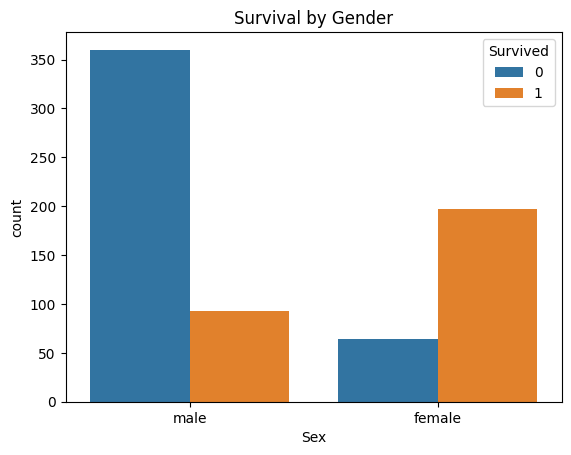

In [63]:
sns.countplot(data=data, x='Sex', hue='Survived')
plt.title("Survival by Gender")
plt.show()


In [53]:
data.isnull().sum()

Sex           0
Age         177
Fare          0
Pclass        0
Survived      0
dtype: int64

### As there are 177 rows with no age so we are dropping that rows to make prediction of model more accurate

In [65]:
data=data.dropna()
x=data[['Sex','Age','Fare','Pclass']]
y=data['Survived']


In [66]:
le=LabelEncoder()
x['Gender']=le.fit_transform(x['Sex'])
x.drop('Sex',axis=1,inplace=True)

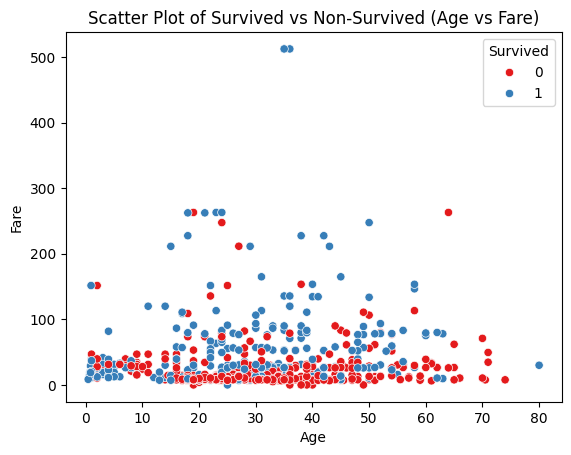

In [69]:
x_plot = x.copy()
x_plot['Survived'] = y
sns.scatterplot(data=x_plot, x='Age', y='Fare', hue='Survived', palette='Set1')
plt.title("Scatter Plot of Survived vs Non-Survived (Age vs Fare)")
plt.show()


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
y_pred=model.predict(x_test)

In [58]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.6993006993006993